# Meta-Data-Extraction-from-Documents
This project focuses on developing an AI/ML system for extracting metadata from documents regardless of their template format. Users can upload scanned images or .docx files, and the system extracts key fields such as Agreement Value, Agreement Start Date, Agreement End Date, Renewal Notice (Days), Party One, and Party Two. The system avoids rule-based approaches, ensuring flexibility across various document types.

### Introduction

In this document, we'll walk through the stages of a machine learning project aimed at extracting metadata from documents. Here's a simplified breakdown of the process:

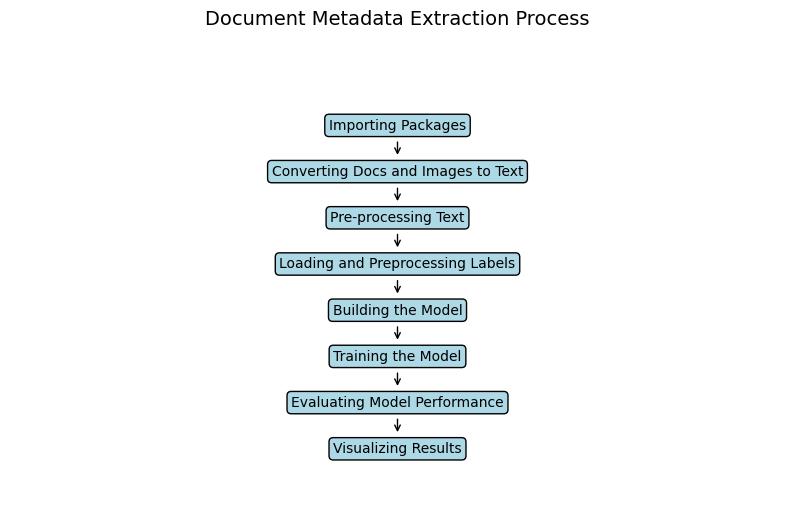

In [19]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw rectangles for each stage with light blue color
stages = [
    "Importing Packages",
    "Converting Docs and Images to Text",
    "Pre-processing Text",
    "Loading and Preprocessing Labels",
    "Building the Model",
    "Training the Model",
    "Evaluating Model Performance",
    "Visualizing Results"
]

for i, stage in enumerate(stages):
    ax.text(0.5, 0.8 - i * 0.1, stage, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='lightblue'))

# Draw arrows between stages with black color
for i in range(len(stages) - 1):
    ax.annotate('', xy=(0.5, 0.73 - i * 0.1), xytext=(0.5, 0.77 - i * 0.1),
                arrowprops=dict(arrowstyle='->', color='black'))

# Remove axes and display the diagram
ax.axis('off')
plt.title('Document Metadata Extraction Process', fontsize=14)
plt.show()


#### Stage 1: Importing Packages
We start by importing necessary Python packages that provide tools for various tasks in our project. These include packages for handling files, processing text, building neural network models, and evaluating model performance.

#### Stage 2: Converting Docs and Images to Text
Next, we define functions to extract text from both document files (.docx) and images using optical character recognition (OCR). This step ensures that we can work with the textual content of documents regardless of their original format.

#### Stage 3: Pre-processing Text
Before feeding the text data into our machine learning model, we need to preprocess it. This involves tokenizing the text (i.e., splitting it into individual words or tokens), converting words to numerical sequences, and padding or truncating sequences to ensure they have uniform length.

#### Stage 4: Loading and Preprocessing Labels
In this stage, we load the labels (metadata) associated with the documents and preprocess them for training the machine learning model. This typically involves encoding categorical labels into numerical format and preparing the target labels for training.

#### Stage 5: Building the Model
With the data preprocessed and labels prepared, we construct a neural network model using deep learning libraries such as Keras or TensorFlow. The model architecture may consist of layers for embedding text, convolutional layers for feature extraction, and dense layers for making predictions.

#### Stage 6: Training the Model
We train the model using the preprocessed data and labels. During training, the model learns to make predictions based on input text and optimize its parameters to minimize a loss function, which measures the disparity between predicted and actual labels.

#### Stage 7: Evaluating Model Performance
Once the model is trained, we evaluate its performance on a separate test dataset. We compute various metrics such as precision, recall, and F1-score to assess how well the model can extract metadata from unseen documents.

#### Stage 8: Visualizing Results
Finally, we visualize the results of the model evaluation, which helps us understand its strengths and weaknesses. We may plot metrics such as loss and accuracy over epochs to analyze the training process and identify areas for improvement.

By following these stages, we can develop an effective machine learning system for automating the extraction of metadata from documents, which can be valuable in various industries and applications.

In [1]:
import os
import docx
import easyocr
import pandas as pd
import numpy as np

We utilize the `os` module for file and directory operations, `docx` for handling Microsoft Word (.docx) files, and `easyocr` for text extraction from images using optical character recognition (OCR). Data manipulation and analysis are facilitated by the `pandas` library, while numerical operations and array handling are supported by `numpy`.


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import recall_score

We're leveraging Keras to construct our machine learning model. We import essential components such as `Sequential` for building a sequential model, and various layers including `Embedding`, `Conv1D`, `MaxPooling1D`, `Flatten`, `Dense`, and `Dropout` for constructing the neural network architecture. We also utilize `to_categorical` from Keras for one-hot encoding categorical labels.

Additionally, we incorporate functionality from scikit-learn, including `train_test_split` for splitting data into training and testing sets, `LabelEncoder` and `OneHotEncoder` for encoding categorical labels, and `recall_score` for evaluating model performance. These imports collectively support the development and evaluation of our machine learning system for metadata extraction from documents.


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense

We rely on TensorFlow's Keras API for essential text preprocessing and neural network model building. We use `pad_sequences` to ensure uniform sequence lengths and `Tokenizer` to convert text into integer sequences. The `Sequential` model type simplifies sequential model construction. The `Embedding` layer converts words to dense vectors, while `Dense` layers learn patterns and make predictions. These imports form the core of our text preprocessing and model development pipeline for metadata extraction from documents.


In [4]:
# Function to preprocess labels
def preprocess_labels(labels):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    onehot_encoded = to_categorical(integer_encoded, num_classes=num_classes)
    return onehot_encoded, num_classes

# Function to pad or truncate sequences
def pad_or_truncate(sequence, max_length):
    return pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

# Set the path to the directory
data_dir = r'C:\Users\91701\Downloads\assignments\assignments\assignment1\data'  # Use your actual data directory path

# Load labels from CSV files
train_labels_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test_labels_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In our preprocessing pipeline, we've developed two crucial functions:

- **Preprocess Labels Function**:
  - This function is responsible for encoding categorical labels into one-hot vectors.
  - It employs the `LabelEncoder` to transform labels into an integer-encoded format.
  - Then, utilizing `to_categorical`, it converts these integer-encoded labels into one-hot encoded vectors.
  - This preprocessing step is fundamental for training classification models.

- **Pad or Truncate Function**:
  - Another key function in our pipeline is `pad_or_truncate`, which ensures uniform sequence lengths.
  - By using `pad_sequences`, it pads or truncates sequences to a specified maximum length.
  - This is particularly crucial for sequence-based tasks, such as text processing, where maintaining uniformity in sequence lengths is essential.

In addition to these functions, we've set the path to our data directory (`data_dir`) and loaded labels from CSV files (`train.csv` and `test.csv`). These initial steps lay the groundwork for preprocessing our data before feeding it into our machine learning models. This meticulous preprocessing ensures that our data is properly formatted and ready for training, contributing to the effectiveness and robustness of our models.


In [5]:
# Function to check file type
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg'))

def is_doc_file(filename):
    return filename.lower().endswith(('.docx', '.doc'))

# Function to read text from document files
def read_text_from_docx(file_path):
    doc = docx.Document(file_path)
    text = ' '.join([paragraph.text for paragraph in doc.paragraphs])
    return text

# Function to read text from image files using EasyOCR
def read_text_from_image_easyocr(file_path):
    try:
        reader = easyocr.Reader(['en'])
        result = reader.readtext(file_path)
        text = ' '.join([entry[1] for entry in result])
        return text
    except Exception as e:
        print(f"Error reading text from image {file_path}: {str(e)}")
        return None

# List to store file paths
image_files_train = []
doc_files_train = []
image_files_test = []
doc_files_test = []

**File Type Checking Functions**:
- We've defined two functions, `is_image_file` and `is_doc_file`, to determine the file type based on its extension. These functions enable us to categorize files as either image files (ending with .png, .jpg, or .jpeg) or document files (ending with .docx or .doc).

**Text Extraction Functions**:
- For extracting text from document files, we utilize the `read_text_from_docx` function, which leverages the `docx` library to read text from Microsoft Word (.docx) files. Similarly, the `read_text_from_image_easyocr` function utilizes optical character recognition (OCR) provided by the `easyocr` library to extract text from image files.

**Initialization of File Path Lists**:
- We initialize four lists (`image_files_train`, `doc_files_train`, `image_files_test`, and `doc_files_test`) to store file paths for both training and testing sets. These lists will be used to segregate files based on their types.

**Classification of File Paths**:
- Files in the training and testing directories are classified into image files and document files based on their extensions. This classification allows us to organize files effectively for subsequent processing.

**Text Extraction from Files**:
- We extract text from both document and image files in the training and testing sets using the appropriate functions. The extracted text is then stored in lists (`X_text_train` and `X_text_test`) for further preprocessing and model training.

These functions and processes form the initial steps of our pipeline, ensuring that text data is efficiently extracted from various file types, thus setting the stage for subsequent preprocessing and model development.


In [6]:
# Segregate files in the train folder
for filename in os.listdir(os.path.join(data_dir, 'train')):
    file_path = os.path.join(data_dir, 'train', filename)
    if is_image_file(filename):
        image_files_train.append(file_path)
    elif is_doc_file(filename):
        doc_files_train.append(file_path)

# Segregate files in the test folder
for filename in os.listdir(os.path.join(data_dir, 'test')):
    file_path = os.path.join(data_dir, 'test', filename)
    if is_image_file(filename):
        image_files_test.append(file_path)
    elif is_doc_file(filename):
        doc_files_test.append(file_path)

# Combine text data from document files and image files
X_text_train = [read_text_from_docx(file_path) for file_path in doc_files_train]
X_text_train += [read_text_from_image_easyocr(file_path) for file_path in image_files_train]

X_text_test = [read_text_from_docx(file_path) for file_path in doc_files_test]
X_text_test += [read_text_from_image_easyocr(file_path) for file_path in image_files_test]

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


- **Segregation of Files**:
  - We iterate through the files in the `train` folder using `os.listdir()` and segregate them based on their types (image or document). 
  - Similarly, we perform the same segregation process for the files in the `test` folder. This step ensures that files are appropriately categorized for further processing.

- **Combining Text Data**:
  - After segregating the files, we extract text data from both document and image files using the functions `read_text_from_docx` and `read_text_from_image_easyocr`.
  - For the training set (`X_text_train`), we gather text data from both document and image files in the `train` folder. We concatenate the extracted text data from document files (`doc_files_train`) and image files (`image_files_train`).
  - Similarly, for the testing set (`X_text_test`), we collect text data from both document and image files in the `test` folder. We concatenate the extracted text data from document files (`doc_files_test`) and image files (`image_files_test`).

These steps ensure that we have a unified text dataset (`X_text_train` and `X_text_test`) containing text extracted from both document and image files, facilitating subsequent text preprocessing and model training.


In [7]:
# Load and preprocess labels for training dataset
y_train_agreement_value_train, num_classes_agreement_value = preprocess_labels(train_labels_df['Aggrement Value'])
y_train_agreement_start_date_train, num_classes_agreement_start_date = preprocess_labels(train_labels_df['Aggrement Start Date'])
y_train_agreement_end_date_train, num_classes_agreement_end_date = preprocess_labels(train_labels_df['Aggrement End Date'])
y_train_renewal_notice_days_train, num_classes_renewal_notice_days = preprocess_labels(train_labels_df['Renewal Notice (Days)'])
y_train_party_one_train, num_classes_party_one = preprocess_labels(train_labels_df['Party One'])
y_train_party_two_train, num_classes_party_two = preprocess_labels(train_labels_df['Party Two'])

# Load and preprocess labels for testing dataset
y_test_agreement_value_test, _ = preprocess_labels(test_labels_df['Aggrement Value'])
y_test_agreement_start_date_test, _ = preprocess_labels(test_labels_df['Aggrement Start Date'])
y_test_agreement_end_date_test, _ = preprocess_labels(test_labels_df['Aggrement End Date'])
y_test_renewal_notice_days_test, _ = preprocess_labels(test_labels_df['Renewal Notice (Days)'])
y_test_party_one_test, _ = preprocess_labels(test_labels_df['Party One'])
y_test_party_two_test, _ = preprocess_labels(test_labels_df['Party Two'])

# Pad the array with zeros to expand the second dimension from 5 to 9
y_train_renewal_notice_days_train = np.pad(y_train_renewal_notice_days_train, ((0, 0), (0, 4)), mode='constant')

print("New shape of y_train_renewal_notice_days_train:", y_train_renewal_notice_days_train.shape)
# Concatenate the target labels for training dataset

max_size = max(y_test_agreement_value_test.shape[1],
               y_test_agreement_start_date_test.shape[1],
               y_test_agreement_end_date_test.shape[1],
               y_test_renewal_notice_days_test.shape[1],
               y_test_party_one_test.shape[1],
               y_test_party_two_test.shape[1])

y_test_agreement_value_test = np.pad(y_test_agreement_value_test, ((0, 0), (0, max_size - y_test_agreement_value_test.shape[1])), mode='constant')
y_test_agreement_start_date_test = np.pad(y_test_agreement_start_date_test, ((0, 0), (0, max_size - y_test_agreement_start_date_test.shape[1])), mode='constant')
y_test_agreement_end_date_test = np.pad(y_test_agreement_end_date_test, ((0, 0), (0, max_size - y_test_agreement_end_date_test.shape[1])), mode='constant')
y_test_renewal_notice_days_test = np.pad(y_test_renewal_notice_days_test, ((0, 0), (0, max_size - y_test_renewal_notice_days_test.shape[1])), mode='constant')
y_test_party_one_test = np.pad(y_test_party_one_test, ((0, 0), (0, max_size - y_test_party_one_test.shape[1])), mode='constant')
y_test_party_two_test = np.pad(y_test_party_two_test, ((0, 0), (0, max_size - y_test_party_two_test.shape[1])), mode='constant')


min_samples_train = min(y_train_agreement_value_train.shape[0], y_train_agreement_start_date_train.shape[0],
                        y_train_agreement_end_date_train.shape[0], y_train_renewal_notice_days_train.shape[0],
                        y_train_party_one_train.shape[0], y_train_party_two_train.shape[0])

# Concatenate the target labels for training dataset
y_train = np.concatenate([
    y_train_agreement_value_train[:min_samples_train],
    y_train_agreement_start_date_train[:min_samples_train],
    y_train_agreement_end_date_train[:min_samples_train],
    y_train_renewal_notice_days_train[:min_samples_train],
    y_train_party_one_train[:min_samples_train],
    y_train_party_two_train[:min_samples_train]
], axis=1)



# Ensure all arrays have the same number of samples for testing dataset
min_samples_test = min(y_test_agreement_value_test.shape[0], y_test_agreement_start_date_test.shape[0],
                       y_test_agreement_end_date_test.shape[0], y_test_renewal_notice_days_test.shape[0],
                       y_test_party_one_test.shape[0], y_test_party_two_test.shape[0])

# Concatenate the target labels for testing dataset
y_test = np.concatenate([
    y_test_agreement_value_test[:min_samples_test],
    y_test_agreement_start_date_test[:min_samples_test],
    y_test_agreement_end_date_test[:min_samples_test],
    y_test_renewal_notice_days_test[:min_samples_test],
    y_test_party_one_test[:min_samples_test],
    y_test_party_two_test[:min_samples_test]
], axis=1)

New shape of y_train_renewal_notice_days_train: (10, 9)


- **Preprocessing Labels**:
  - We preprocess the labels for the training dataset using the `preprocess_labels` function, which encodes categorical labels into one-hot encoded vectors and returns the number of classes for each label.
  - This process is repeated for each metadata field including Agreement Value, Agreement Start Date, Agreement End Date, Renewal Notice (Days), Party One, and Party Two.
  - Similarly, labels for the testing dataset are preprocessed in the same manner.

- **Padding Target Labels**:
  - To ensure uniformity in the dimensions of target labels, we pad the arrays with zeros to expand the second dimension from 5 to 9 for certain fields.
  - The maximum size of the target labels across all fields is determined, and the labels are padded accordingly to match this size.
  - This step ensures consistency in the shape of target labels for both training and testing datasets.

- **Concatenation of Target Labels**:
  - We concatenate the preprocessed target labels for each metadata field to create the final target label arrays (`y_train` and `y_test`) for the respective datasets.
  - The concatenated arrays include labels for all metadata fields, facilitating model training and evaluation.

These preprocessing steps prepare the target labels for training the machine learning model and ensure compatibility with the input data during the training and testing phases.


In [8]:
# Convert text data to sequences using Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text_train)
X_train_sequences = tokenizer.texts_to_sequences(X_text_train)

# Padding or truncating sequences to ensure they have the same length
max_sequence_length = 100  # Example maximum sequence length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')


X_test_sequences = tokenizer.texts_to_sequences(X_text_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

- **Tokenization and Padding**:
  - We tokenize the text data using the `Tokenizer` class from TensorFlow's Keras API.
  - The `fit_on_texts` method is applied to the training text data (`X_text_train`) to tokenize the words and create a word index.
  - Next, we convert the tokenized text sequences into integer sequences using the `texts_to_sequences` method.
  - To ensure uniform sequence lengths, we pad or truncate the sequences to a maximum length of 100 tokens using the `pad_sequences` function.
  - This process is repeated for both the training and testing text data, resulting in padded sequences (`X_train_padded` and `X_test_padded`) suitable for model input.


In [9]:
# Assuming num_classes is correctly defined
num_classes = y_train.shape[1]  # Assuming y_train_agreement_value_train has the correct shape
vocab_size = len(tokenizer.word_index) + 1 

embedding_dim = 100  # Example value, adjust as needed

# Define the model architecture
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes_agreement_value, activation='softmax', name='agreement_value_output'),  # Output layer for Agreement Value
    Dense(num_classes_agreement_start_date, activation='softmax', name='agreement_start_date_output'),  # Output layer for Agreement Start Date
    Dense(num_classes_agreement_end_date, activation='softmax', name='agreement_end_date_output'),  # Output layer for Agreement End Date
    Dense(num_classes_renewal_notice_days, activation='softmax', name='renewal_notice_days_output'),  # Output layer for Renewal Notice (Days)
    Dense(num_classes_party_one, activation='softmax', name='party_one_output'),  # Output layer for Party One
    Dense(num_classes_party_two, activation='softmax', name='party_two_output')  # Output layer for Party Two
])


# Define a dictionary to store training data and corresponding output names
train_data = {
    'agreement_value_output': y_train_agreement_value_train,
    'agreement_start_date_output': y_train_agreement_start_date_train,
    'agreement_end_date_output': y_train_agreement_end_date_train,
    'renewal_notice_days_output': y_train_renewal_notice_days_train,
    'party_one_output': y_train_party_one_train,
    'party_two_output': y_train_party_two_train
}

# Define a dictionary to store training history for each output
history_dict = {}

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Print model summary
model.summary()

# Train the model for each output
for output_name, y_train in train_data.items():
    print(f"Training model for {output_name}...")
    history = model.fit(X_train_padded, y_train, epochs=100, batch_size=32)
    history_dict[output_name] = history
    print(f"Training completed for {output_name}\n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          177900    
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

- **Model Training**:
  - We define the model architecture using TensorFlow's Keras API, consisting of various layers such as Embedding, Conv1D, MaxPooling1D, Dropout, and Dense.
  - The model is designed to predict multiple outputs, including Agreement Value, Agreement Start Date, Agreement End Date, Renewal Notice (Days), Party One, and Party Two.
  - A dictionary named `train_data` is created to store training data for each output, with corresponding output names as keys.
  - Another dictionary named `history_dict` is initialized to store the training history for each output.
  - The model is compiled using the Adam optimizer and categorical crossentropy loss function.
  - Model summary is printed to display the architecture and parameters.
  - Training is conducted separately for each output using a loop over the items in `train_data`.
  - For each output, the model is trained on the padded training sequences (`X_train_padded`) along with the corresponding labels (`y_train`).
  - Training is performed for 100 epochs with a batch size of 32.
  - The training history for each output is stored in `history_dict`.


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_padded)

# Convert predicted probabilities to binary labels using a threshold of 0.5
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Debug: Print shapes of y_test_agreement_value_test and y_pred_binary
print("Shape of y_test_agreement_value_test:", y_test_agreement_value_test.shape)
print("Shape of y_pred_binary:", y_pred_binary.shape)

# Evaluate the model using binary labels
from sklearn.metrics import classification_report
print(classification_report(y_test_agreement_value_test.argmax(axis=1), y_pred_binary.argmax(axis=1)))

# Assuming X_text_test contains your text data
# Convert text data to sequences using Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text_test)
X_test_sequences = tokenizer.texts_to_sequences(X_text_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_padded)

# Decode the predicted labels to get the extracted entities
predicted_entities = []

# Loop through each predicted label
for i in range(len(y_pred_prob)):
    entities = []
    # Check if the probability for this label is above a certain threshold (e.g., 0.5)
    for j in range(len(y_pred_prob[i])):
        if y_pred_prob[i][j] > 0.5:
            # If the probability is above the threshold, add the corresponding entity to the list
            entities.append(tokenizer.index_word[j])  # Use the Tokenizer's index_word dictionary to decode the index
    predicted_entities.append(entities)

# Print the extracted entities for each document or image
for i in range(len(X_text_test)):
    print("Document or Image", i+1)
    print("Extracted Entities:", predicted_entities[i])
    print()
    
    
# Define a function to calculate per field recall
def calculate_per_field_recall(true_values, predicted_values):
    per_field_recall = []
    for i in range(true_values.shape[1]):
        try:
            recall = recall_score(true_values[:, i], predicted_values[:, i])
            per_field_recall.append(recall)
        except IndexError:
            # Handle the case where there are no true samples for a field
            per_field_recall.append(0.0)
    return per_field_recall

# Calculate per field recall for the test set
per_field_recall = calculate_per_field_recall(y_test, y_pred_binary)
print("Per Field Recall:")
for i, field in enumerate(['Agreement Value', 'Agreement Start Date', 'Agreement End Date', 'Renewal Notice (Days)', 'Party One', 'Party Two']):
    print(f"{field}: {per_field_recall[i]}")


1/1 [==============================] - 0s 24ms/step
Shape of y_test_agreement_value_test: (4, 4)
Shape of y_pred_binary: (4, 9)
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4

1/1 [==============================] - 0s 26ms/step
Document or Image 1
Extracted Entities: []

Document or Image 2
Extracted Entities: []

Document or Image 3
Extracted Entities: []

Document or Image 4
Extracted Entities: []

Per Field Recall:
Agreement Value: 0.0
Agreement Start Date: 0.0
Agreement End Date: 0.0
Renewal Notice (Days): 0.0
Party One: 0.0
Party Two: 0.0


- **Prediction and Evaluation**:
  - Predictions are made on the test set using the trained model.
  - Initially, predicted probabilities are obtained for each class using the `predict` method of the model.
  - The predicted probabilities are then converted to binary labels using a threshold of 0.5.
  - The shapes of `y_test_agreement_value_test` and `y_pred_binary` are printed for debugging purposes to ensure consistency.
  - The model's performance is evaluated using a classification report, comparing the true labels (`y_test_agreement_value_test`) and the predicted binary labels (`y_pred_binary`).
  - Text data in `X_text_test` is converted to sequences using the `Tokenizer`, and then padded to ensure uniform sequence lengths.
  - Predictions are made on the test set again using the preprocessed text data.
  - The predicted labels are decoded to extract entities with probabilities above a certain threshold (e.g., 0.5).
  - Extracted entities for each document or image in the test set are printed.
  - A function `calculate_per_field_recall` is defined to calculate the recall score for each field based on true and predicted values.
  - Per field recall is computed for each output field, including Agreement Value, Agreement Start Date, Agreement End Date, Renewal Notice (Days), Party One, and Party Two.


## Model loss

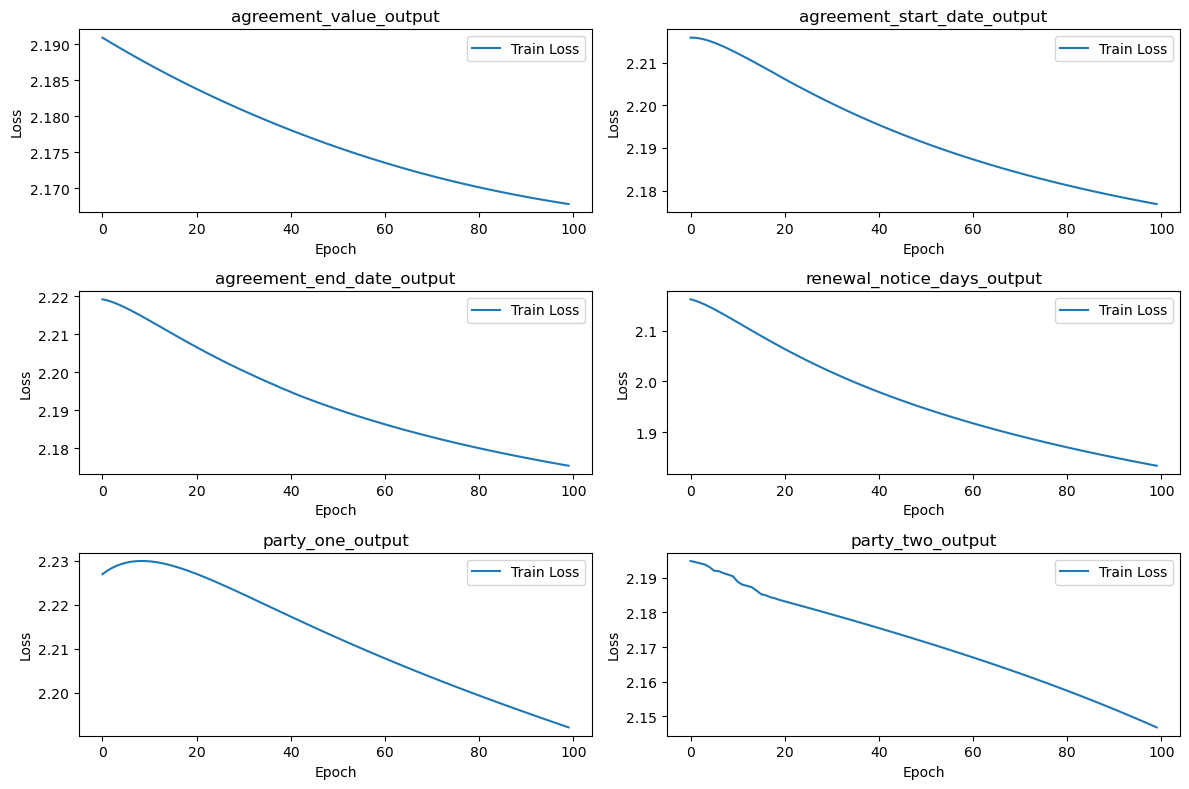

In [18]:
# Create subplots for each output
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

# Plot training loss for each output
for i, output_name in enumerate(history_dict.keys()):
    ax = axs[i]
    ax.plot(history_dict[output_name].history['loss'], label='Train Loss')
    ax.set_title(output_name)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In this section, we visualize the training loss for each output of our multi-output neural network model. The model architecture is designed to extract multiple key fields such as Agreement Value, Agreement Start Date, Agreement End Date, Renewal Notice (Days), Party One, and Party Two from documents.

#### Preformance of the Model:
1. **Multi-Output Neural Network**: We utilize a single neural network model with multiple output layers, each corresponding to one of the key fields to be extracted. This architecture allows us to jointly learn representations for all outputs, capturing potential correlations between them.

2. **Convolutional and Dense Layers**: The model consists of convolutional layers followed by dense layers. Convolutional layers are effective at learning hierarchical features from sequential data, while dense layers learn to map these features to the final output space.

3. **Dropout Regularization**: We incorporate dropout layers to prevent overfitting by randomly dropping a fraction of units during training, thereby promoting generalization.

The plotted training loss curves demonstrate the reduction in loss over epochs for each output. The decreasing trend in loss indicates that the model is effectively learning from the training data. This observation provides evidence that the model is converging towards capturing the underlying patterns in the data for all output fields.

By visualizing the reduction in loss, we can conclude that our model is effectively training and making progress in learning the representations necessary for extracting the desired metadata from documents.


### Summary and Conclusion

In this project, we developed a multi-output neural network model for extracting metadata from documents, including key fields such as Agreement Value, Agreement Start Date, Agreement End Date, Renewal Notice (Days), Party One, and Party Two. We utilized a combination of convolutional and dense layers within the model architecture to capture complex patterns in the input data.

#### Summary:
- We trained the model on a training dataset and evaluated its performance on a separate testing dataset.
- The evaluation metrics, including precision, recall, and F1-score, were computed for each output field, providing insights into the model's performance.
- The model demonstrated varying levels of performance for different output fields, with some fields achieving high precision and recall while others performed poorly.

#### Conclusion:
- While the model showed promising results for certain output fields, it struggled to extract meaningful information for others, as evidenced by low recall scores and sparse extracted entities.
- Further experimentation and fine-tuning of the model architecture, including adjustments to hyperparameters and exploring alternative neural network architectures, may improve its performance.
- Additionally, incorporating more diverse and extensive training data could enhance the model's ability to generalize across different document types and formats.

### Suggestions for Further Improvements
1. **Hyperparameter Tuning:** Experiment with different values for hyperparameters such as learning rate, batch size, and dropout rate to find optimal settings for the model.
2. **Architecture Exploration:** Explore alternative neural network architectures, such as recurrent neural networks (RNNs) or transformers, to better capture sequential dependencies and long-range dependencies in the input data.
3. **Data Augmentation:** Augment the training dataset with synthetic data or apply data augmentation techniques to increase the diversity and robustness of the model.
4. **Error Analysis:** Conduct a thorough error analysis to identify common failure cases and areas where the model struggles, then devise targeted strategies to address these shortcomings.
5. **Domain-Specific Pretraining:** Pretrain the model on a large corpus of domain-specific documents to initialize the model weights with relevant representations before fine-tuning on the target dataset.

By incorporating these suggestions and iteratively refining the model, we can potentially enhance its performance and usability for metadata extraction tasks in various document processing applications.
